### 1. Impor Pustaka
Sel ini mengimpor semua pustaka yang diperlukan untuk analisis data, visualisasi, dan pemodelan, termasuk `pandas` untuk manipulasi data, `matplotlib` dan `seaborn` untuk visualisasi, serta `firebase_admin` untuk interaksi dengan Firebase Realtime Database.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.animation as animation
import datetime
import seaborn as sns
import missingno as msno
import firebase_admin
from firebase_admin import credentials, db
from datetime import datetime  # Untuk konversi timestamp ke human-readable
sns.set_theme(style="whitegrid")
%matplotlib inline 

In [2]:
# Konfigurasi database sumber
source_cred = credentials.Certificate("kunci_firebase.json")
firebase_admin.initialize_app(source_cred, {
    'databaseURL': 'https://kumbung-sense-default-rtdb.asia-southeast1.firebasedatabase.app/'
})

In [3]:
# Input readable date
start_readable_date = "01-06-2025 00:00:00"  # Format: DD-MM-YYYY HH:MM:SS
end_readable_date = "30-07-2025 23:59:59"  # Format: DD-MM-YYYY HH:MM:SS

# Convert readable date to Unix timestamp
start_timestamp = int(datetime.strptime(start_readable_date, "%d-%m-%Y %H:%M:%S").timestamp())
print(start_timestamp) # Convert to string and print
end_timestamp = int(datetime.strptime(end_readable_date, "%d-%m-%Y %H:%M:%S").timestamp())
print(end_timestamp) # Convert to string and print


1748710800
1753894799


In [4]:
# Refer ke path data
ref_data = db.reference('/JU3dPIvArGbuoRUywdcTmdVkQRr2/sensor/data')

# Ambil data yang key-nya berada dalam rentang waktu yang ditentukan
query_data = ref_data.order_by_key().start_at(str(start_timestamp)).end_at(str(end_timestamp))

# Ambil hasil
results_data = query_data.get()


In [5]:
# Mengubah data menjadi DataFrame pandas untuk data pertama
if results_data:
    kumbung = pd.DataFrame.from_dict(results_data, orient='index')
    
    # Jika 'timestamp' sudah ada, jangan pindahkan indeks ke kolom
    if 'timestamp' not in kumbung.columns:
        kumbung.index.name = 'timestamp'  # Mengatur nama indeks
        kumbung.reset_index(inplace=True)  # Memindahkan indeks menjadi kolom biasa
    
    print("Data dari sumber pertama:")
    print(kumbung.head())  # Menampilkan data untuk verifikasi
else:
    print("Tidak ada data dari sumber pertama")

Data dari sumber pertama:
            humidity     light  moisture  temperature   timestamp
1751123465     89.17  10.83333  28.47375        29.67  1751123465
1751123495     89.16  10.83333  29.32845        29.67  1751123495
1751123525     89.17  10.83333  29.42613        29.65  1751123525
1751123555     89.19  10.83333  29.25519        29.69  1751123555
1751123585     89.23  10.83333  29.62149        29.66  1751123585


In [6]:
kumbung.tail(10)

,humidity,light,moisture,temperature,timestamp
1751702504,87.28,0.833333,21.48962,29.87,1751702504
1751702534,87.19,0.833333,21.09890,29.90,1751702534
1751702564,87.11,0.833333,21.36752,29.89,1751702564
1751702594,87.09,0.833333,21.46520,29.90,1751702594
1751702624,86.97,0.833333,21.19658,29.89,1751702624
1751702654,86.94,0.833333,21.46520,29.86,1751702654
1751702684,86.99,0.833333,21.46520,29.90,1751702684
1751702714,87.08,0.833333,21.46520,29.89,1751702714
1751702744,87.12,0.833333,21.14774,29.90,1751702744
1751702774,87.02,0.833333,21.46520,29.90,1751702774


In [7]:
kumbung['timestamp']= kumbung['timestamp'].astype(int)
kumbung.tail(10)

,humidity,light,moisture,temperature,timestamp
1751702504,87.28,0.833333,21.48962,29.87,1751702504
1751702534,87.19,0.833333,21.09890,29.90,1751702534
1751702564,87.11,0.833333,21.36752,29.89,1751702564
1751702594,87.09,0.833333,21.46520,29.90,1751702594
1751702624,86.97,0.833333,21.19658,29.89,1751702624
1751702654,86.94,0.833333,21.46520,29.86,1751702654
1751702684,86.99,0.833333,21.46520,29.90,1751702684
1751702714,87.08,0.833333,21.46520,29.89,1751702714
1751702744,87.12,0.833333,21.14774,29.90,1751702744
1751702774,87.02,0.833333,21.46520,29.90,1751702774


In [8]:
# Konversi timestamp ke datetime dalam format UTC
kumbung['timestamp'] = pd.to_datetime(kumbung['timestamp'], unit='s', utc=True)

# Mengonversi ke zona waktu WIB (Asia/Jakarta)
kumbung['timestamp'] = kumbung['timestamp'].dt.tz_convert('Asia/Jakarta')

In [9]:
kumbung.dtypes

humidity                            float64
light                               float64
moisture                            float64
temperature                         float64
timestamp      datetime64[ns, Asia/Jakarta]
dtype: object

In [10]:
kumbung.head(10)

,humidity,light,moisture,temperature,timestamp
1751123465,89.17,10.83333,28.47375,29.67,2025-06-28 22:11:05+07:00
1751123495,89.16,10.83333,29.32845,29.67,2025-06-28 22:11:35+07:00
1751123525,89.17,10.83333,29.42613,29.65,2025-06-28 22:12:05+07:00
1751123555,89.19,10.83333,29.25519,29.69,2025-06-28 22:12:35+07:00
1751123585,89.23,10.83333,29.62149,29.66,2025-06-28 22:13:05+07:00
1751123615,89.19,10.83333,29.76801,29.66,2025-06-28 22:13:35+07:00
1751123645,89.19,10.83333,29.42613,29.65,2025-06-28 22:14:05+07:00
1751123675,89.23,10.83333,28.49817,29.66,2025-06-28 22:14:35+07:00
1751123814,89.26,10.83333,28.40049,29.65,2025-06-28 22:16:54+07:00
1751123844,89.26,10.83333,28.49817,29.67,2025-06-28 22:17:24+07:00


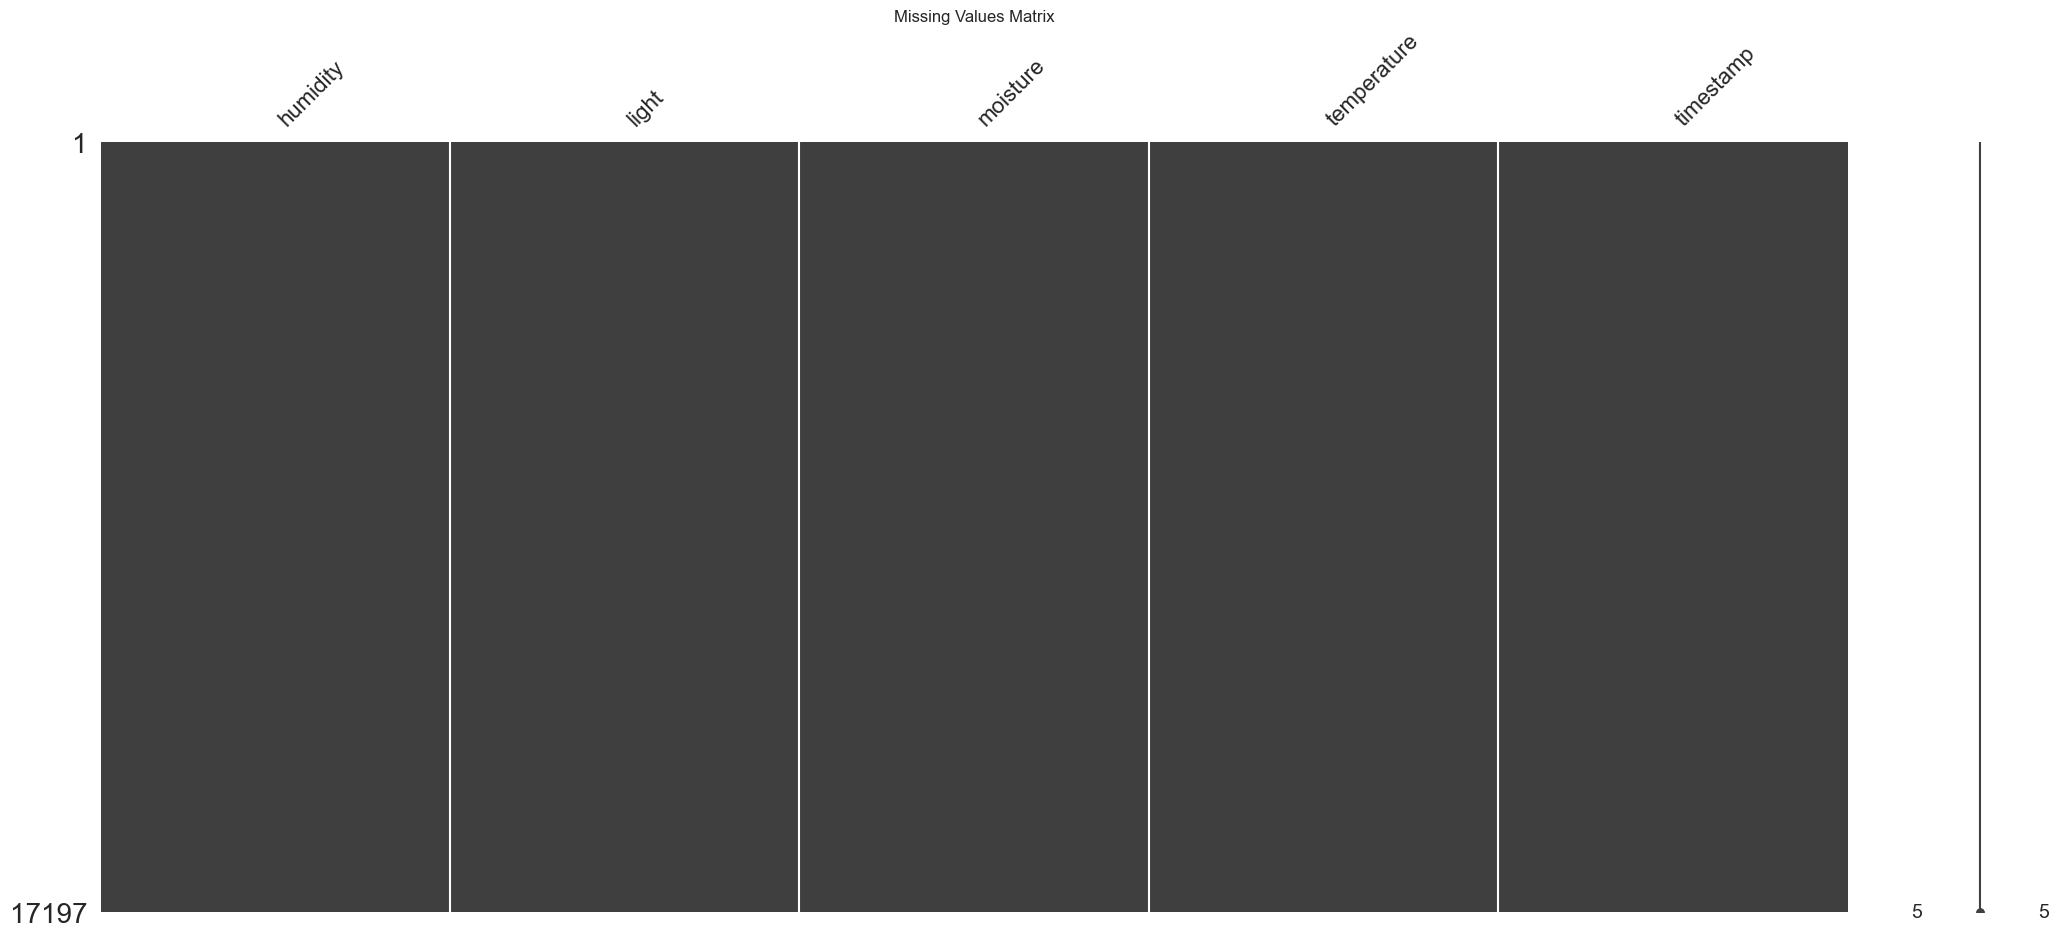

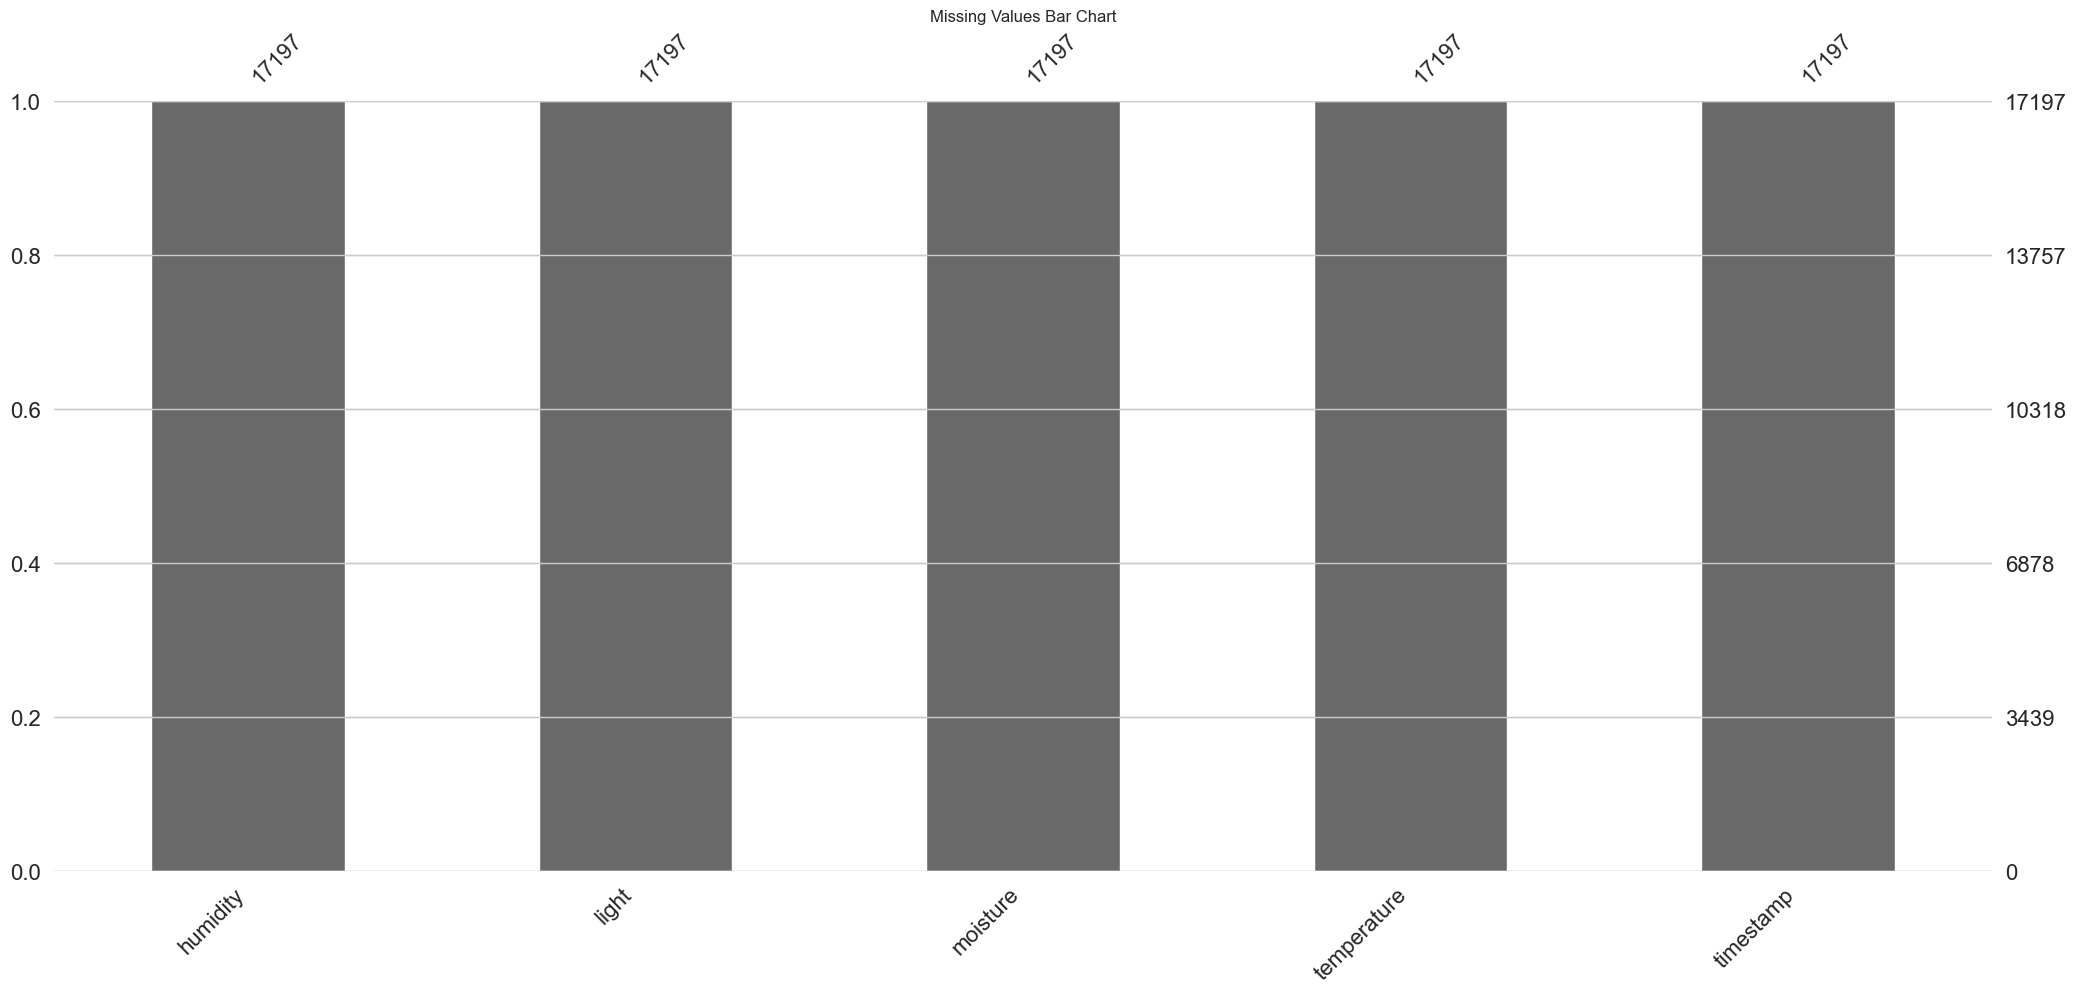

d:\conda_env\tensorflow\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
d:\conda_env\tensorflow\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


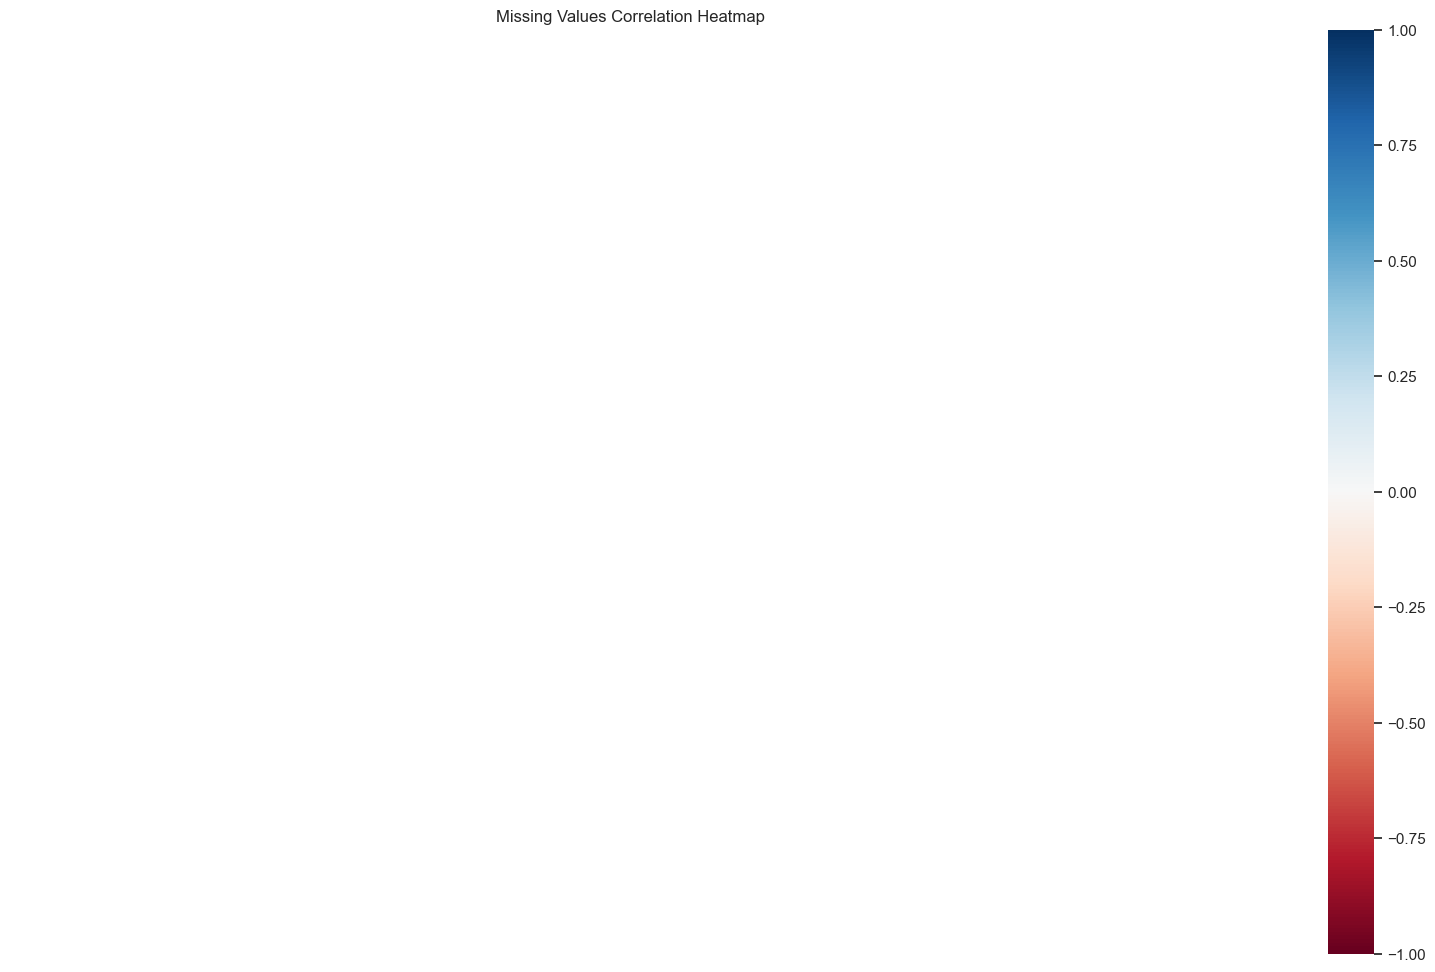

humidity       0
light          0
moisture       0
temperature    0
timestamp      0
dtype: int64


In [11]:
# Visualisasi missing values untuk kumbung
msno.matrix(kumbung)
plt.title("Missing Values Matrix")
plt.show()

msno.bar(kumbung)
plt.title("Missing Values Bar Chart")
plt.show()

msno.heatmap(kumbung)
plt.title("Missing Values Correlation Heatmap")
plt.show()

# Menampilkan ringkasan missing values
print(kumbung.isnull().sum())

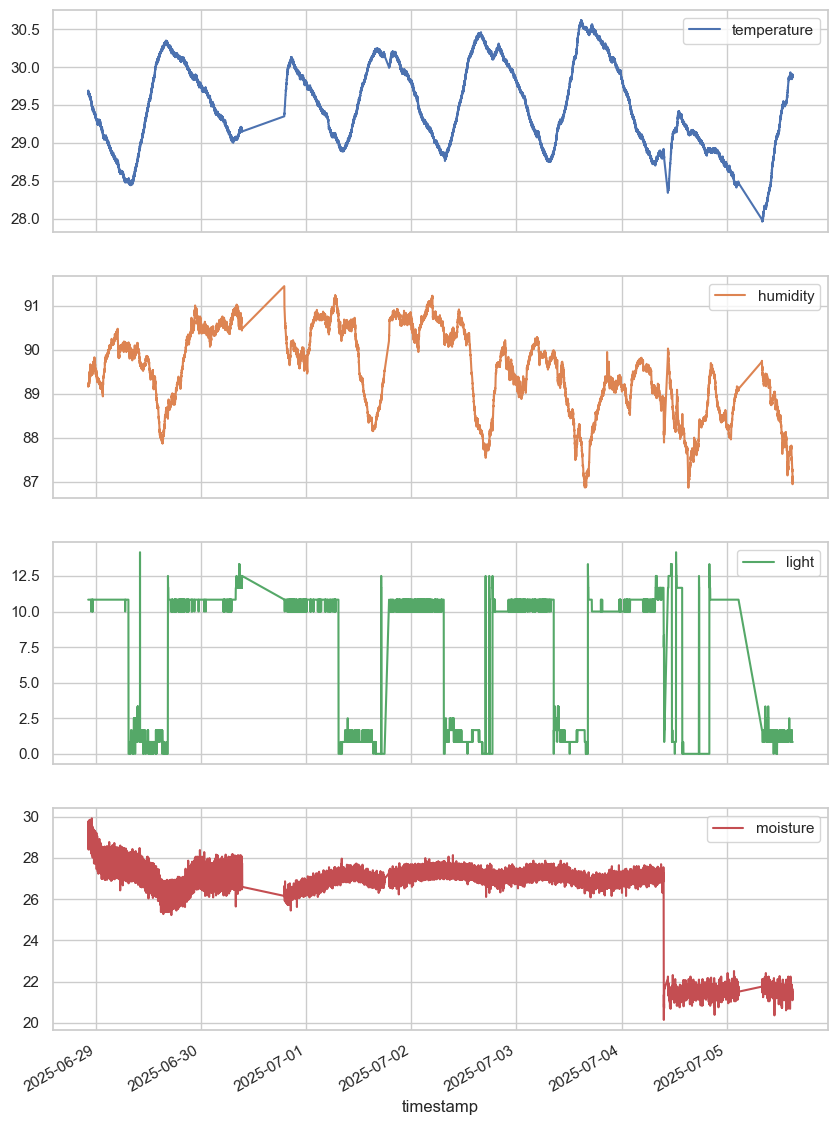

In [12]:
kumbung.plot(
    y=[
    'temperature', 
    'humidity',
    'light',
    'moisture'
    ],
    x='timestamp',
    subplots=True, figsize=(10, 15))
plt.show()

In [13]:
# Ekspor kumbung2 ke CSV dengan delimiter titik koma (;)
kumbung.to_csv('kumbung.csv', sep=',', index=False)

In [14]:
# Mengubah kolom 'timestamp' menjadi datetime
kumbung['timestamp'] = pd.to_datetime(kumbung['timestamp'])

# Mengurutkan data berdasarkan 'timestamp'
kumbung = kumbung.sort_values(by='timestamp')

# Menambahkan kolom 'hour', 'minute', 'day', 'month', dan 'year' dari 'timestamp'
kumbung['hour'] = kumbung['timestamp'].dt.hour
kumbung['minute'] = kumbung['timestamp'].dt.minute
kumbung['day'] = kumbung['timestamp'].dt.day
kumbung['week'] = kumbung['timestamp'].dt.isocalendar().week
kumbung['month'] = kumbung['timestamp'].dt.month
kumbung['year'] = kumbung['timestamp'].dt.year

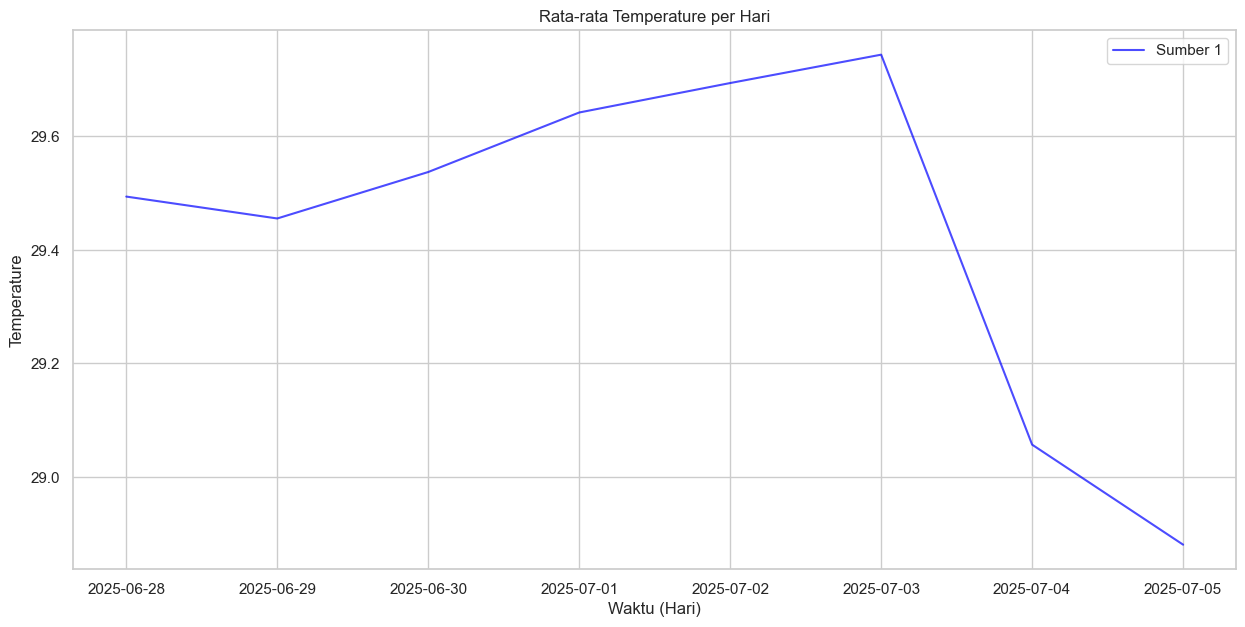

In [15]:
# Variabel pengganti untuk menentukan kolom yang akan digunakan
column_to_plot = 'temperature'  # Ubah ke 'humidity' atau 'pressure' sesuai kebutuhan

# Mengelompokkan data berdasarkan hari dan menghitung rata-rata untuk kolom yang dipilih
kumbung['day'] = kumbung['timestamp'].dt.floor('d')  # Membulatkan ke hari terdekat

# Menghitung rata-rata per hari untuk kolom yang dipilih
kumbung_daily = kumbung.groupby('day')[column_to_plot].mean().reset_index()

# Plot data dari kedua DataFrame
plt.figure(figsize=(15, 7))

# Plot data dari kumbung
plt.plot(kumbung_daily['day'], kumbung_daily[column_to_plot], label='Sumber 1', color='blue', alpha=0.7)

# Menambahkan label, judul, dan legenda
plt.xlabel('Waktu (Hari)')
plt.ylabel(f'{column_to_plot.capitalize()}')
plt.title(f'Rata-rata {column_to_plot.capitalize()} per Hari')
plt.legend()
plt.grid(True)

# Menampilkan plot
plt.show()

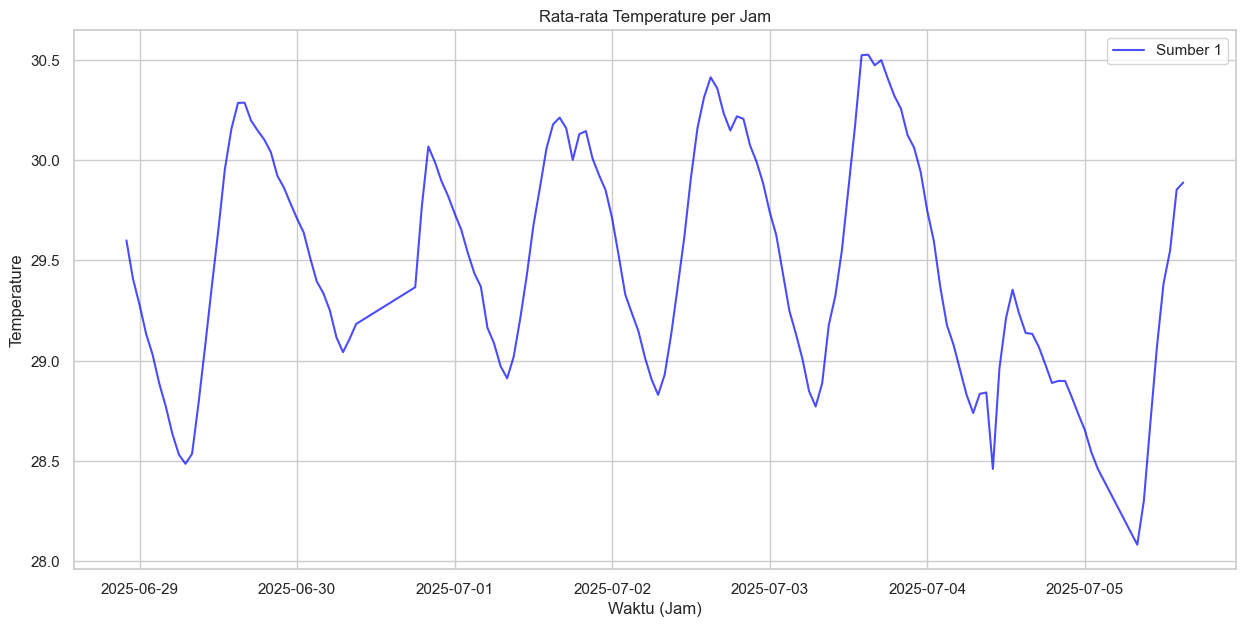

In [16]:
# Variabel pengganti untuk menentukan kolom yang akan digunakan
column_to_plot = 'temperature'  # Ubah ke 'humidity' atau 'pressure' sesuai kebutuhan

# Mengelompokkan data berdasarkan jam dan menghitung rata-rata
kumbung['hour'] = kumbung['timestamp'].dt.floor('h')  # Membulatkan ke jam terdekat

# Menghitung rata-rata per jam untuk kolom yang dipilih
kumbung_hourly = kumbung.groupby('hour')[column_to_plot].mean().reset_index()

# Plot data dari kedua DataFrame
plt.figure(figsize=(15, 7))

# Plot data dari kumbung
plt.plot(kumbung_hourly['hour'], kumbung_hourly[column_to_plot], label='Sumber 1', color='blue', alpha=0.7)

# Menambahkan label, judul, dan legenda
plt.xlabel('Waktu (Jam)')
plt.ylabel(f'{column_to_plot.capitalize()}')
plt.title(f'Rata-rata {column_to_plot.capitalize()} per Jam')
plt.legend()
plt.grid(True)

# Menampilkan plot
plt.show()

In [17]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [18]:
# Mengelompokkan data berdasarkan jam dan menghitung rata-rata variabel
kumbung_hourly = kumbung.groupby('hour')['temperature'].mean().reset_index()

# Pastikan data sudah terurut berdasarkan waktu
kumbung_hourly = kumbung_hourly.sort_values(by='hour').reset_index(drop=True)

# Menyiapkan data untuk model
def create_sequences(data, lookback, forecast_horizon):
    X, y = [], []
    for i in range(len(data) - lookback - forecast_horizon):
        X.append(data[i:i + lookback])
        y.append(data[i + lookback:i + lookback + forecast_horizon])
    return np.array(X), np.array(y)

In [19]:
# Normalisasi data
scaler = MinMaxScaler()
temperature_scaled = scaler.fit_transform(kumbung_hourly[['temperature']].values)

In [20]:
# Membuat dataset
lookback = 10  # Menggunakan data jam sebelumnya
forecast_horizon = 10  # Memprediksi beberapa jam ke depan
X, y = create_sequences(temperature_scaled, lookback, forecast_horizon)

In [21]:
# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Membangun model TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, activation='relu', input_shape=(lookback, 1), return_sequences=True),
    tf.keras.layers.LSTM(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(forecast_horizon),
])

d:\conda_env\tensorflow\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
# Mengatur optimizer dengan learning rate khusus
optimizer = Adam(learning_rate=0.001)  # Ubah nilai learning rate sesuai kebutuhan
model.compile(optimizer=optimizer, loss='mse', metrics=['accuracy'])

In [24]:
# Melatih model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 691ms/step - accuracy: 0.0000e+00 - loss: 0.4047 - val_accuracy: 0.0000e+00 - val_loss: 0.3900
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.0000e+00 - loss: 0.3888 - val_accuracy: 0.0000e+00 - val_loss: 0.3774
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.0000e+00 - loss: 0.3739 - val_accuracy: 0.0000e+00 - val_loss: 0.3641
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.0000e+00 - loss: 0.3538 - val_accuracy: 0.0000e+00 - val_loss: 0.3494
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.0000e+00 - loss: 0.3491 - val_accuracy: 0.0000e+00 - val_loss: 0.3325
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.0000e+00 - loss: 0.3288 - val_accuracy: 0.0000e+00 - val_loss: 0.3120
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.0000e+00 - loss: 0.3066 - val_accuracy: 0.0000e+00 - val_loss: 0.2869
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accura

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


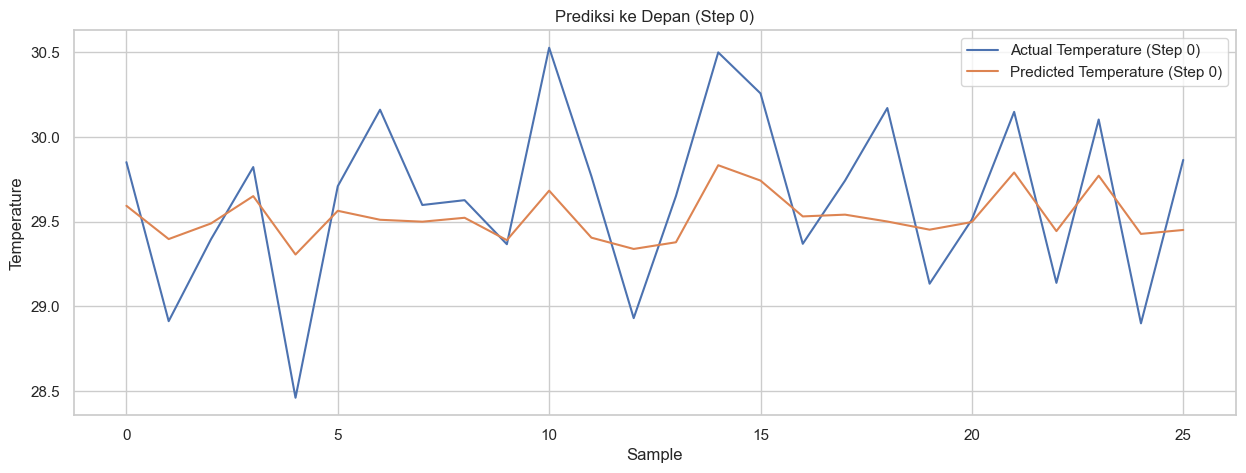

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 156,992 (613.25 KB)

 Trainable params: 52,330 (204.41 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 104,662 (408.84 KB)

In [25]:
# Membuat prediksi
predictions = model.predict(X_test)

# Membalikkan normalisasi untuk interpretasi hasil
# Reshape predictions dan y_test agar menjadi 2D sebelum inverse_transform
predictions_rescaled = scaler.inverse_transform(predictions.reshape(-1, 1)).reshape(predictions.shape)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(y_test.shape)

# Menampilkan hasil prediksi vs data aktual untuk langkah pertama (step 0 dari 6 jam ke depan)
plt.figure(figsize=(15, 5))
plt.plot(y_test_rescaled[:50, 0], label='Actual Temperature (Step 0)')
plt.plot(predictions_rescaled[:50, 0], label='Predicted Temperature (Step 0)')
plt.legend()
plt.title('Prediksi ke Depan (Step 0)')
plt.xlabel('Sample')
plt.ylabel('Temperature')
plt.show()
model.summary()

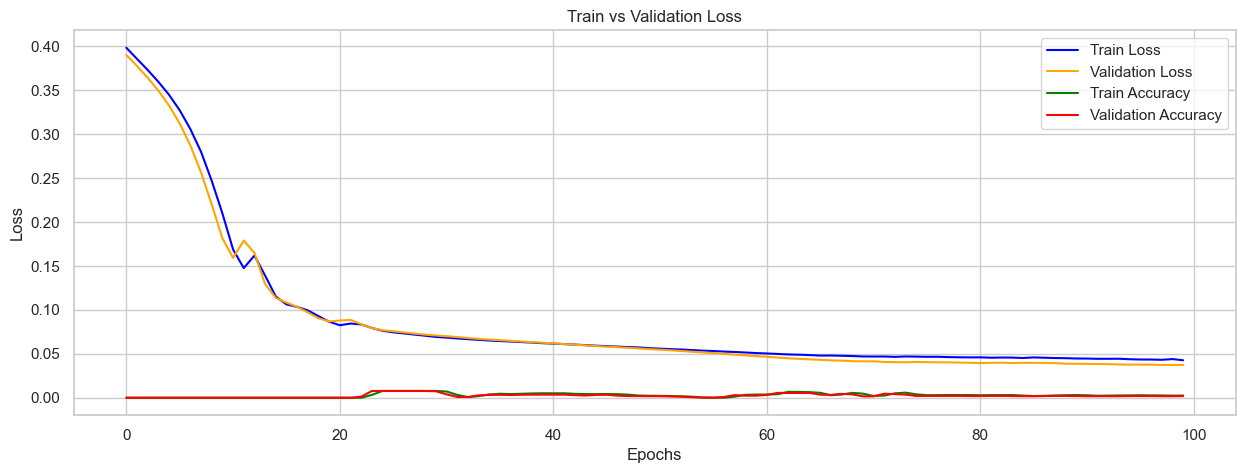

In [26]:
plt.figure(figsize=(15, 5))
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.plot(history.history['accuracy'], label='Train Accuracy', color='green')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Train vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

### Menguji Model dengan Data Baru
Selanjutnya, kita akan menguji model dengan data input baru untuk memprediksi suhu di jam-jam berikutnya. Kita akan menggunakan data terakhir dari dataset sebagai input.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step
Prediksi suhu untuk 8 jam ke depan:
Jam ke-1: 29.60°C
Jam ke-2: 29.72°C
Jam ke-3: 29.71°C
Jam ke-4: 29.78°C
Jam ke-5: 29.83°C
Jam ke-6: 29.89°C
Jam ke-7: 29.87°C
Jam ke-8: 29.74°C
Jam ke-9: 29.76°C
Jam ke-10: 29.79°C


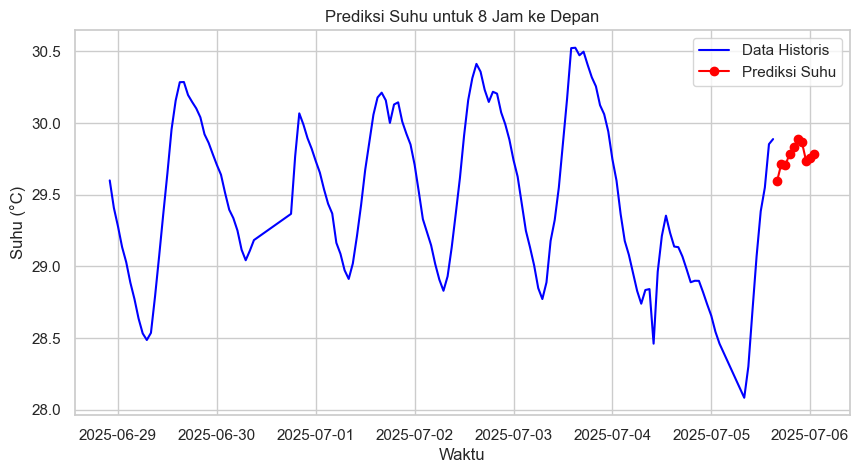

In [27]:
# Mengambil data terakhir dari dataset untuk pengujian
last_data = temperature_scaled[-lookback:]

# Mengubah bentuk data agar sesuai dengan input model
last_data = last_data.reshape(1, lookback, 1)

# Membuat prediksi
new_predictions = model.predict(last_data)

# Membalikkan normalisasi untuk mendapatkan nilai suhu aktual
new_predictions_rescaled = scaler.inverse_transform(new_predictions)

# Menampilkan hasil prediksi
print("Prediksi suhu untuk 8 jam ke depan:")
for i, temp in enumerate(new_predictions_rescaled[0]):
    print(f"Jam ke-{i+1}: {temp:.2f}°C")

# Visualisasi hasil prediksi
plt.figure(figsize=(10, 5))

# Plot data historis
plt.plot(kumbung_hourly['hour'], kumbung_hourly['temperature'], label='Data Historis', color='blue')

# Menyiapkan sumbu x untuk prediksi
last_hour = kumbung_hourly['hour'].iloc[-1]
prediction_hours = pd.to_datetime([last_hour + pd.DateOffset(hours=i) for i in range(1, forecast_horizon + 1)])

# Plot prediksi
plt.plot(prediction_hours, new_predictions_rescaled[0], label='Prediksi Suhu', color='red', marker='o')

plt.title('Prediksi Suhu untuk 8 Jam ke Depan')
plt.xlabel('Waktu')
plt.ylabel('Suhu (°C)')
plt.legend()
plt.grid(True)
plt.show()